# Heavy Traffic Indicators on I-94

## Content 

1. Introduction
2. Data Exporation
3. Data Analysis and Visualization
    a) Time Indicator
    b) Weather Indicator
4. Conclusion

## 1. Introduction

The goal of our analysis is to determining indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. We wish to find the through this project.

The dataset documentation mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west).

This means that the results of this analysis will be about the westbound traffic in the proximity of that station.

## 2. Data Exploration

In [3]:
import pandas as pd

traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [4]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [5]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [6]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


## 3. Data Analysis and Visualization

In [7]:
%matplotlib inline

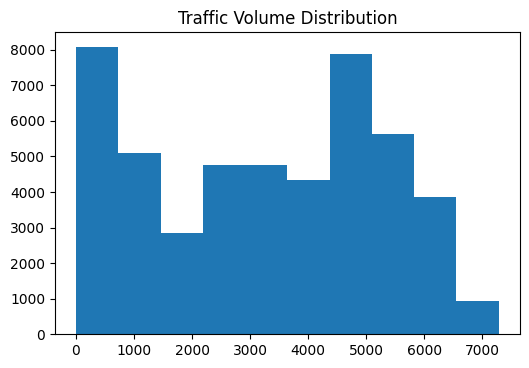

In [8]:
import matplotlib.pyplot as plt

plt.hist(traffic['traffic_volume'])
plt.title('Traffic Volume Distribution')
plt.show()

In [9]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

### a) Time Indicator

To find traffic during daytime and night time, we'll start by dividing the dataset into two parts:

1. Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
2. Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

In [10]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [11]:
traffic['Hour'] = traffic['date_time'].dt.hour

In [12]:
traffic['Hour'].unique()

array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,
        2,  3,  4,  5,  6,  8,  7])

In [13]:
day = traffic.loc[traffic['Hour'].isin(list(range(7,19)))]
night = traffic.loc[traffic['Hour'].isin([19,20,21,22,23,0,1,2,3,4,5,6])]

In [14]:
day['Hour'].unique()

array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,  8,  7])

In [15]:
night['Hour'].unique()

array([19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6])

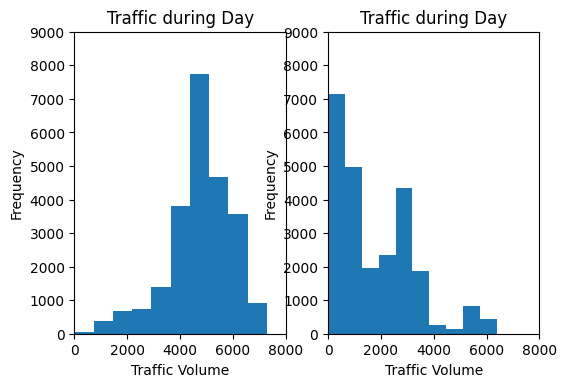

In [16]:
plt.figure()
plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.title('Traffic during Day')
plt.xlim([0,8000])
plt.ylim([0,9000])
plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.title('Traffic during Day')
plt.xlim([0,8000])
plt.ylim([0,9000])
plt.show()

In [17]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [18]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

Traffic volume during day is normally distributed with heavy average traffic volume of 4762, while during night the traffic is skewed towards right with average traffic volumeof 1785. 

Since we are looking to find causes ofheavy traffic, we can leave out the dataframe containing the night time data.

In [21]:
day.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,Hour,month
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9,10
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11,10
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12,10
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13,10


In [20]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

<ipython-input-20-b104fbd4ed31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['month'] = day['date_time'].dt.month


month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

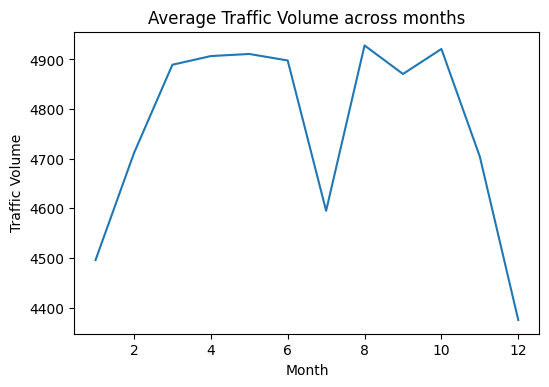

In [28]:
plt.plot(list(range(1,13)), by_month['traffic_volume'])
plt.xlabel('Month')
plt.ylabel('Traffic Volume')
plt.title('Average Traffic Volume across months')
plt.show()

The traffic is higher during warm months (March–October) compared to cold months (November–February).

In [29]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

<ipython-input-29-e4e897828b56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['dayofweek'] = day['date_time'].dt.dayofweek


dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

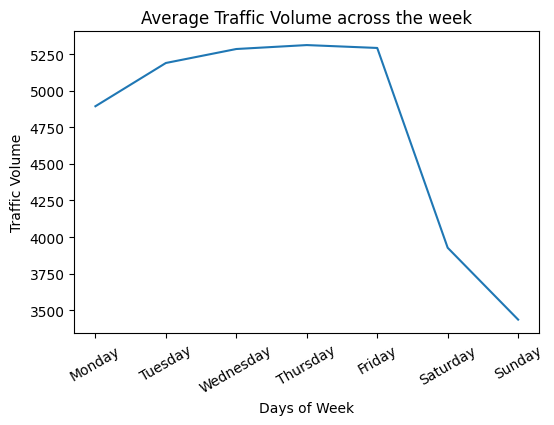

In [32]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.plot(days, by_dayofweek['traffic_volume'])
plt.xlabel('Days of Week')
plt.ylabel('Traffic Volume')
plt.title('Average Traffic Volume across the week')
plt.xticks(rotation=30)
plt.show()

The traffic is higher on weekdays than on weekends (Saturday & Sunday)

We'll now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately.

In [34]:
day['hour'] = day['date_time'].dt.hour
weekdays = day[day['dayofweek']<=4]
weekend = day[day['dayofweek']>4]

by_hour_business = weekdays.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

<ipython-input-34-fb0bec4418bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['hour'] = day['date_time'].dt.hour


In [35]:
by_hour_business

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,Hour,month,dayofweek
hour,,,,,,,,
7,278.662639,0.145105,0.000068,50.538983,6030.413559,7.0,6.363390,1.984407
8,278.938443,0.144614,0.000135,53.666441,5503.497970,8.0,6.567659,1.989175
9,279.628421,0.156829,0.000139,53.619709,4895.269257,9.0,6.484386,1.981263
10,280.664650,0.113984,0.000033,54.781417,4378.419118,10.0,6.481283,1.957888
11,281.850231,0.151976,0.000000,52.808876,4633.419470,11.0,6.448819,1.979957
12,282.832763,0.090271,0.001543,53.855714,4855.382143,12.0,6.569286,1.989286
13,283.292447,0.092433,0.000370,53.325444,4859.180473,13.0,6.465237,1.982988
14,284.091787,0.102991,0.000746,55.326531,5152.995778,14.0,6.588318,1.990852
15,284.450605,0.090036,0.000274,54.168467,5592.897768,15.0,6.541397,1.962563


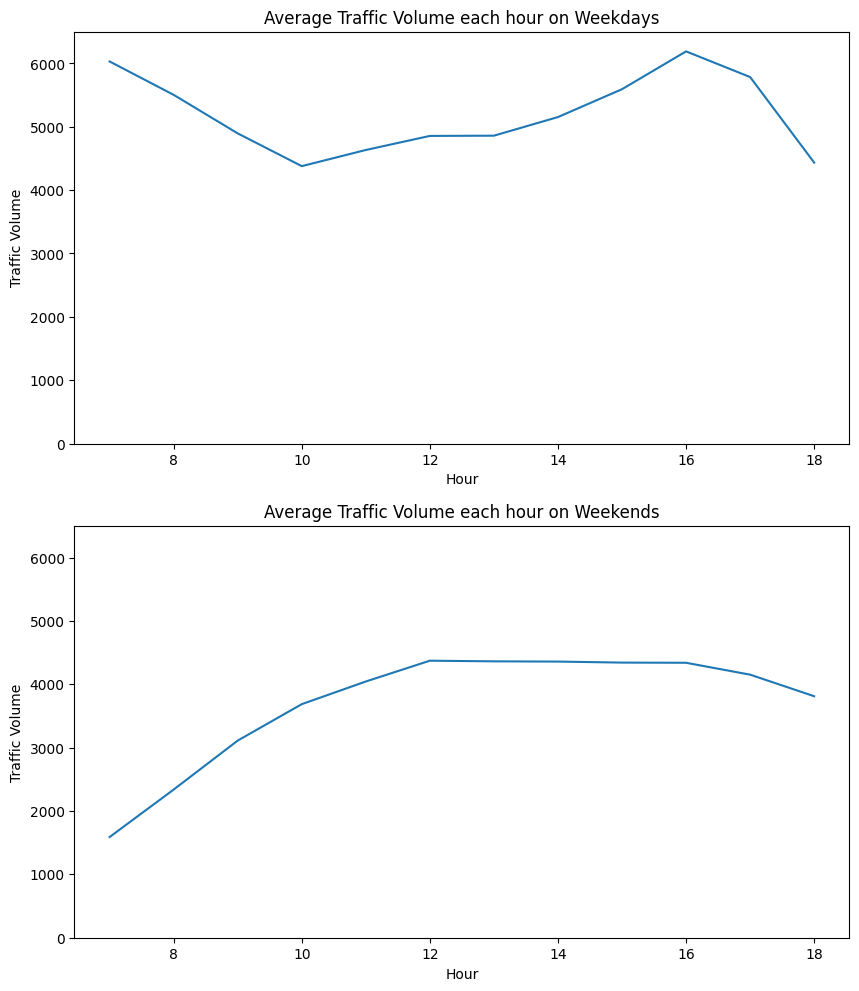

In [39]:
plt.figure(figsize=(10,12))
plt.subplot(2,1,1)
plt.plot(list(range(7,19)),by_hour_business['traffic_volume'])
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.title('Average Traffic Volume each hour on Weekdays')
plt.ylim([0,6500])

plt.subplot(2,1,2)
plt.plot(list(range(7,19)),by_hour_weekend['traffic_volume'])
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.title('Average Traffic Volume each hour on Weekends')
plt.ylim([0,6500])

plt.show()

From the analysis done on time indicator of traffic, it can be seen that: 
1. The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
2. The traffic is usually heavier on business days compared to weekends.
3. On business days, the rush hours are around 7 and 16.

### b) Weather Indicator

**Weather is another possible factor for traffic**

In [44]:
day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23877 entries, 0 to 48198
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              23877 non-null  object        
 1   temp                 23877 non-null  float64       
 2   rain_1h              23877 non-null  float64       
 3   snow_1h              23877 non-null  float64       
 4   clouds_all           23877 non-null  int64         
 5   weather_main         23877 non-null  object        
 6   weather_description  23877 non-null  object        
 7   date_time            23877 non-null  datetime64[ns]
 8   traffic_volume       23877 non-null  int64         
 9   Hour                 23877 non-null  int64         
 10  month                23877 non-null  int64         
 11  dayofweek            23877 non-null  int64         
 12  hour                 23877 non-null  int64         
dtypes: datetime64[ns](1), float64(3

In [45]:
day.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,Hour,month,dayofweek,hour
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9,10,1,9
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,10,1,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11,10,1,11
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12,10,1,12
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13,10,1,13


In [43]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
Hour              0.172704
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

It can be seen that not much correlation exists between any of the **numerical** weather columns and traffic column.

We'll look next at the categorical weather-related columns: `weather_main` and `weather_description`.

In [47]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_main

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,Hour,month,dayofweek,hour
weather_main,,,,,,,,,
Clear,283.812078,0.000000,0.000000,1.670265,4778.416260,12.404248,6.490599,3.138928,12.404248
Clouds,282.929274,0.000000,0.000000,62.667548,4865.415996,12.911974,6.393243,3.005631,12.911974
Drizzle,284.456433,0.170804,0.000000,84.704417,4837.212911,12.308041,7.105323,2.934315,12.308041
Fog,277.579641,0.163840,0.001409,65.477901,4372.491713,10.325967,6.646409,2.798343,10.325967
Haze,275.319353,0.040036,0.000000,64.000000,4609.893285,12.467626,5.832134,2.754197,12.467626
Mist,279.420825,0.249992,0.000825,74.961435,4623.976475,11.078288,6.734285,2.895102,11.078288
Rain,287.089601,3.972943,0.000292,75.870116,4815.568462,12.642379,6.774023,2.914467,12.642379
Smoke,292.405833,0.878333,0.000000,53.333333,4564.583333,13.166667,6.833333,2.416667,13.166667
Snow,267.984505,0.014017,0.001768,80.501376,4396.321183,12.153370,6.374828,2.750344,12.153370


In [51]:
by_weather_description = day.groupby('weather_description').mean()

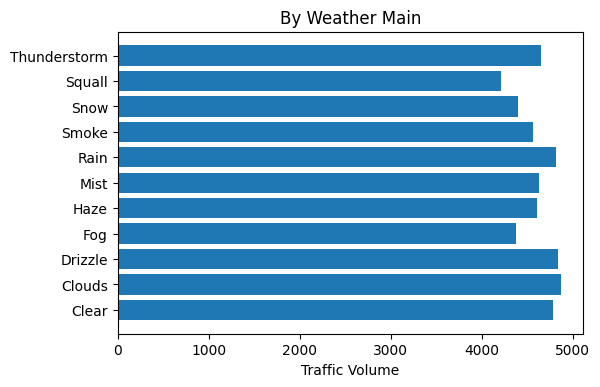

In [53]:
plt.barh(by_weather_main.index, by_weather_main['traffic_volume'])
plt.title('By Weather Main')
plt.xlabel('Traffic Volume')
plt.show()

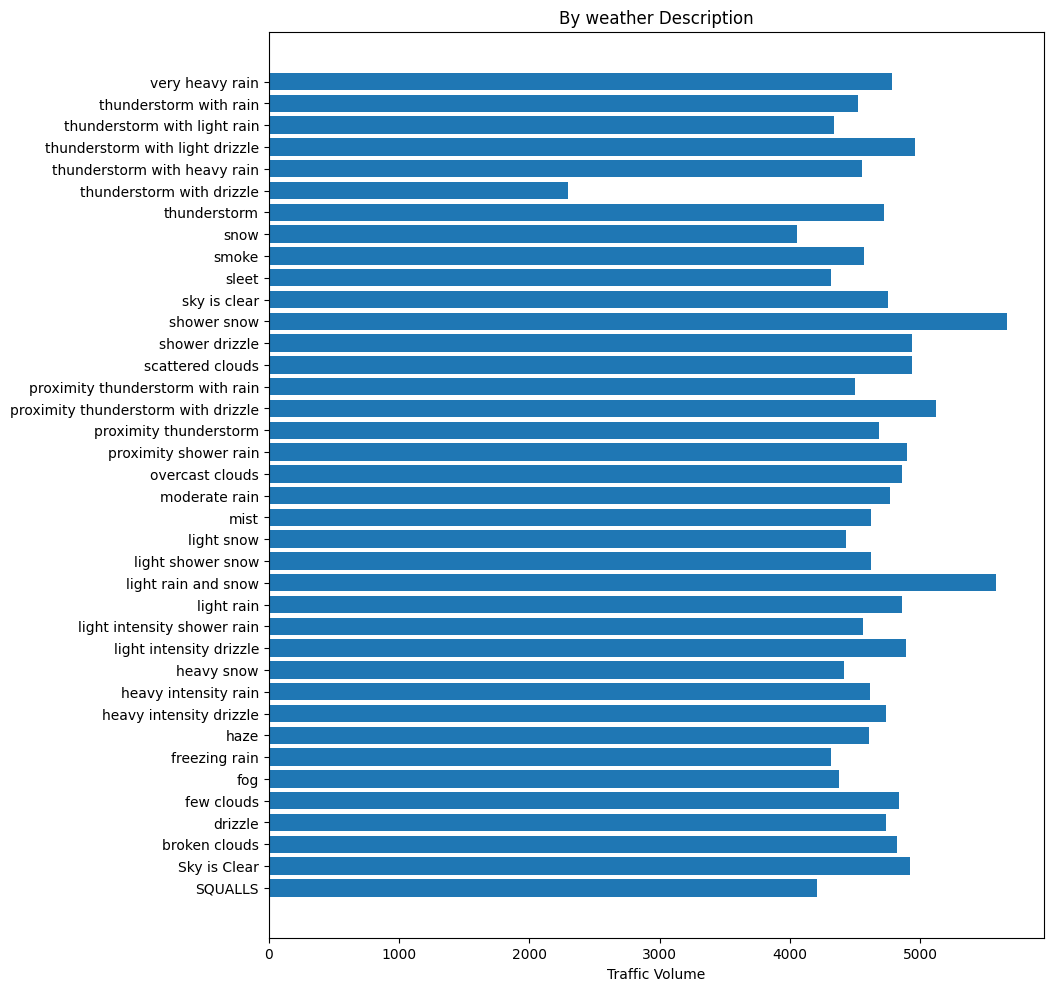

In [55]:
plt.figure(figsize=(10,12))
plt.barh(by_weather_description.index, by_weather_description['traffic_volume'])
plt.title('By weather Description')
plt.xlabel('Traffic Volume')
plt.show()

When weather description is 'Sky is clear' or 'Light rain and Snow', the traffic is more than 5,000 cars and during 'Thunderstorm with drizzle', the traffic is lowest at 2000.

## 4. Conclusion

**From the analysis performed on traffic volume with time and weather factors considered, the following can be concluded:**
1. The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
2. Traffic is higher during daytime (7 am to 7 pm) compared to nighttime (7 pm to 7 am). 
3. The traffic is usually heavier on weekdays (Monday to Friday) than on weekends (Saturday and Sunday). 
4. On week days, the rush hours are around 7 am to 4 pm.
5. Then weather description is 'Sky is clear' or 'Light rain and Snow', the traffic is more than 5,000 cars.
6. During 'Thunderstorm with drizzle', the traffic is lowest at 2000.